# Basic EDA for Anomaly Detection

In [20]:
import os
from dotenv import load_dotenv

load_dotenv()

DB_HOST = os.getenv("SANDHYA_ERP_DB_HOST")
DB_PORT = os.getenv("SANDHYA_ERP_DB_PORT")
DB_USERNAME = os.getenv("SANDHYA_ERP_DB_USERNAME")
DB_PASSWORD = os.getenv("SANDHYA_ERP_DB_PASSWORD")
DB_NAME = os.getenv("SANDHYA_ERP_DB_NAME")

sandhya_erp_db_url = (
    f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

In [21]:
import pandas as pd
import sqlalchemy

In [22]:
engine = sqlalchemy.create_engine(sandhya_erp_db_url)

In [23]:
grn_df = pd.read_sql("SELECT * FROM erpx_dev_rm_procurement.grn", engine)
grn_df.describe().T

,count,mean,min,25%,50%,75%,max,std
grn_id,8152.0,4248.260672,10.0,2223.75,4261.5,6299.25,8337.0,2374.576865
grn_date,8152,2023-11-23 14:38:11.506010880,2023-01-20 18:42:08,2023-05-11 17:23:49.750000128,2023-08-14 15:00:03,2024-05-03 20:47:18,2025-08-15 14:10:21,NaN
is_active,8152.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
created_at,8152,2023-11-23 14:38:40.967277824,2023-01-20 18:43:15.625959,2023-05-11 17:24:26.708793088,2023-08-14 15:00:30.261174016,2024-05-03 20:48:09.950247168,2025-08-15 14:11:03.331916,NaN
updated_at,8152,2023-11-29 14:56:24.549075200,2023-01-21 16:09:34,2023-05-30 11:59:01,2023-08-14 15:01:05.500000,2024-05-03 21:09:46.750000128,2025-08-15 14:12:02,NaN
version_flag,8152.0,1.868008,1.0,2.0,2.0,2.0,9.0,0.417089
indent_no,8152.0,4090.951546,3.0,2038.75,4075.5,6147.25,8185.0,2367.369202
plant_id,8152.0,2.058881,0.0,1.0,2.0,3.0,3.0,0.945564
sub_plant_id,7311.0,3.290931,0.0,0.0,0.0,6.0,13.0,4.388241


In [24]:
grn_items_df = pd.read_sql("SELECT * FROM erpx_dev_rm_procurement.grn_items", engine)
grn_items_df.describe().T

,count,mean,min,25%,50%,75%,max,std
grn_item_id,14528.0,7409.140625,1.0,3790.75,7422.5,11054.25,14686.0,4215.286716
grn_id,14528.0,4259.183232,10.0,2239.75,4376.5,6296.0,8337.0,2370.183537
indent_id,14528.0,4101.808508,3.0,2054.75,4189.5,6142.25,8185.0,2362.585194
sale_order_id,12548.0,2959.721549,220.0,1927.0,2558.0,3948.0,6394.0,1382.114149
sale_order_item_id,12548.0,10920.379423,358.0,8397.0,10295.0,14045.0,17956.0,3765.116926
farmer,14528.0,178.098775,1.0,39.0,132.0,284.0,574.0,158.629181
farmer_code,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
quantity,14528.0,2823.270994,4.0,1149.0,2137.0,3669.0,31870.0,2540.458705
count,14528.0,60.131883,5.0,40.0,54.0,72.0,4850.0,48.772213
price,269.0,517.925651,103.0,278.0,312.0,350.0,50000.0,3044.748637


In [25]:
indent_df = pd.read_sql("SELECT * FROM erpx_dev_rm_procurement.indent", engine)
indent_df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_active,8183.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
created_at,8183,2023-11-22 18:40:41.838826240,2023-01-20 18:36:47.331519,2023-05-09 19:06:33.429176576,2023-08-13 17:14:27.533353984,2024-05-01 12:40:16.069533440,2025-08-15 14:08:37.319313,NaN
updated_at,8183,2023-11-27 18:15:49.407426560,2023-01-20 18:49:11,2023-05-30 12:09:26,2023-08-14 15:48:28,2024-05-03 15:09:46,2025-08-15 14:12:54,NaN
version_flag,8183.0,4.033973,1.0,3.0,4.0,5.0,16.0,1.473242
indent_id,8183.0,4094.0,3.0,2048.5,4094.0,6139.5,8185.0,2362.37296
indent_date,8183,2023-11-19 23:00:22.360381440,2023-01-14 18:30:00,2023-05-08 00:00:00,2023-08-11 00:00:00,2024-04-29 12:37:43,2025-08-13 14:07:21,NaN
commission,8183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
harvesting_date,8183,2023-11-20 23:31:45.910546176,2023-01-15 18:30:00,2023-05-09 00:00:00,2023-08-12 00:00:00,2024-04-30 12:38:52.500000,2025-08-14 14:07:21,NaN
assign_lead_1,8183.0,2897.857998,137.0,2039.0,2039.0,2039.0,15339.0,2279.579479
assign_lead_2,5.0,3612.0,1816.0,1822.0,2054.0,2054.0,10314.0,3748.374581


In [26]:
indent_reading_df = pd.read_sql(
    "SELECT * FROM erpx_dev_rm_procurement.indent_items", engine
)
indent_reading_df.describe().T

,count,mean,min,25%,50%,75%,max,std
indent_item_id,14603.0,7303.0,2.0,3652.5,7303.0,10953.5,14604.0,4215.667326
broker,14603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
farmer,14603.0,178.224817,1.0,39.0,133.0,284.0,574.0,158.533846
farmer_code,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
product,14603.0,1.953023,1.0,2.0,2.0,2.0,3.0,0.212242
expected_count,14603.0,57.251866,1.0,35.0,55.0,75.0,1800.0,30.710657
expected_qty,14603.0,2839.862357,10.0,1100.0,2000.0,3700.0,36000.0,2559.321481
expected_price,14603.0,316.528111,0.0,265.0,300.0,350.0,8000.0,112.510991
expected_count2,12.0,152.083333,34.0,52.75,105.0,235.0,345.0,117.089289
expected_price2,8.0,337.375,90.0,258.75,274.0,281.5,1000.0,275.533217


In [27]:
pp_inward_df = pd.read_sql("SELECT * FROM erpx_dev_production.pp_inward", engine)
pp_inward_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,3309.0,2569.225446,100.0,1478.0,2749.0,3576.0,4599.0,1306.084017
weight_from_gate,3309.0,3654.827999,2.8,1455.0,2610.0,4780.6,36036.0,3425.224606
count_at_farm_gate,3309.0,53.266993,5.0,36.0,50.0,70.0,200.0,25.026592
trays_received_from_farm,3309.0,138.525234,1.0,50.0,91.0,167.0,2601.0,161.4073
lot_start_time,3264,2025-02-25 17:03:14.677389568,2024-05-21 07:25:48,2025-01-24 05:55:33.500000,2025-03-29 04:41:21,2025-05-24 13:22:59.500000,2025-08-18 10:07:24,NaN
lot_end_time,3285,2025-02-26 19:14:15.831963648,2024-05-21 07:25:48,2025-01-24 06:03:23,2025-03-31 04:18:06,2025-05-26 10:27:14,2025-08-18 10:07:24,NaN
verified_weight,3285.0,3672.530964,12.567,1398.6,2556.0,4684.6,171306.0,4944.068742
verified_net_weight,3285.0,2732.243954,-1994739.0,1351.7956,2500.0,4479.6875,171184.0,35530.623988
verified_count,3285.0,53.512487,1.0,36.0,50.0,70.0,200.0,25.033282
verified_no_of_trays,3285.0,137.003044,1.0,49.0,91.0,167.0,2601.0,157.431471


In [28]:
pp_inward_reading_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_inward_reading", engine
)
pp_inward_reading_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,8011.0,8009.374485,963.0,6378.5,8429.0,10433.5,12436.0,3018.847708
session_id,8011.0,2592.073524,109.0,2011.5,2605.0,3390.5,4599.0,1177.756884
weight,8011.0,1124.032489,-1994739.0,70.160004,74.099998,2005.797101,171184.0,24028.314907
total_weight,8011.0,2190.509272,-1994739.0,769.01001,1760.7,3335.15,171184.0,24054.68878
sequence_number,8011.0,21.77069,1.0,1.0,6.0,30.0,211.0,33.447068
crates,8011.0,59.311197,1.0,3.0,3.0,70.0,4587.0,130.860577
epoch,8011.0,1740624346.074772,123456.0,1738905178.5,1742464884.0,1747283266.0,1755491844.0,25087141.482792
epoch_date,8011,2025-02-27 04:34:53.138310144,1970-01-02 10:17:36,2025-02-07 05:12:58,2025-03-20 10:01:24,2025-05-15 09:57:45.500000,2025-08-18 10:07:24,NaN
created_at,8011,2025-03-15 01:21:34.295968,2024-05-29 07:36:04,2025-02-10 08:33:12.500000,2025-03-21 20:49:32,2025-06-03 09:59:55.500000,2025-08-18 10:07:24,NaN


In [29]:
pp_grading_df = pd.read_sql("SELECT * FROM erpx_dev_production.pp_grading", engine)
pp_grading_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,3216.0,2762.534204,106.0,2175.75,3013.5,3819.25,4623.0,1305.737044
lot_id,3216.0,4434.260883,1.0,1514.75,2963.5,3812.5,109689.0,13667.826018
crate_weight,3216.0,1.997869,0.0,2.0,2.2,3.0,22.0,1.182969
created_at,3216,2025-03-09 21:11:40.320895488,2024-05-21 07:41:55,2025-02-03 04:37:45.750000128,2025-04-08 15:27:16.500000,2025-06-03 16:05:56.500000,2025-08-18 12:13:35,NaN
updated_at,3216,2025-03-10 09:34:40.588308224,2024-05-21 07:41:55,2025-02-03 04:44:14.750000128,2025-04-08 23:19:45,2025-06-04 00:48:24,2025-08-18 12:13:38,NaN
closed_at,3202,2025-03-10 02:32:02.257963776,2024-05-21 07:41:55,2025-02-03 04:43:02.249999872,2025-04-08 17:45:00,2025-06-03 21:41:19.500000,2025-08-18 10:24:29,NaN
is_generic,3216.0,0.000622,0.0,0.0,0.0,0.0,1.0,0.024934


In [30]:
pp_grading_grades_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_grading_grades", engine
)
pp_grading_grades_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,14910.0,9128.775922,186.0,5619.25,9358.5,13089.75,16817.0,4663.766806
session_id,14910.0,2948.969752,106.0,2484.0,3188.5,3884.75,4623.0,1224.134594
count,14910.0,43.3622,7.0,26.0,37.0,55.0,238.0,25.798242
uniformity_ratio,14910.0,1.292563,1.0,1.2,1.28,1.3,24.0,0.283738
created_at,14910,2025-03-29 11:24:48.533332992,2024-05-21 07:41:55,2025-03-04 01:19:49,2025-04-21 03:20:31.500000,2025-06-08 14:57:39,2025-08-18 12:28:00,NaN
bin_number,14910.0,2.602482,0.0,1.0,2.0,4.0,120.0,2.380907


In [31]:
pp_grading_readings_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_grading_readings", engine
)
pp_grading_readings_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,137900.0,3371.096026,106.0,2920.0,3519.0,4046.0,4623.0,940.767825
sequence_number,137900.0,55.549478,1.0,16.0,38.0,76.0,577.0,57.885902
epoch,137900.0,1746302044.040566,949002428.0,1743591658.25,1747134676.5,1750622086.75,1755500669.0,7168350.238038
epoch_date,137900,2025-05-03 19:54:51.995257600,2000-01-27 19:47:08,2025-04-02 11:00:58.249999872,2025-05-13 11:11:16.500000,2025-06-22 19:54:46.750000128,2025-08-18 07:04:29,NaN
count,137223.0,36.494348,-1.0,23.5,33.0,44.0,238.0,18.439682
weight,137900.0,59.239567,0.0,36.0,36.060001,37.400002,18423.0,327.110781
crates,137900.0,2.442357,0.0,1.0,1.0,2.0,985.0,16.465592
created_at,137900,2025-05-04 02:40:37.794684416,2024-05-21 07:41:55,2025-04-02 17:38:23,2025-05-13 16:45:14,2025-06-22 20:01:33.750000128,2025-08-18 12:34:35,NaN
bin_number,129197.0,2.745064,0.0,2.0,3.0,4.0,120.0,1.680957


In [32]:
pp_soaking_lot_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_soaking_lot", engine
)
pp_soaking_lot_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,41907.0,64756.131505,65.0,44616.5,69286.0,79765.5,90242.0,18802.571125
session_id,41907.0,64177.484812,71.0,44549.5,68867.0,78664.5,88807.0,18352.93499
count,41907.0,49.794561,-1.0,25.0,36.0,52.0,906.0,40.093227
created_at,41907,2025-04-08 04:47:51.776552704,2024-05-28 07:35:35,2025-02-11 17:22:15,2025-04-03 09:02:22,2025-06-12 13:52:58.500000,2025-08-18 12:32:35,NaN
grading_lot_id,32396.0,3096.87625,107.0,2281.0,3442.0,4040.0,4583.0,1174.089538


In [45]:
pp_soaking_df = pd.read_sql("SELECT * FROM erpx_dev_production.pp_soaking", engine)
pp_soaking_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,42511.0,62445.169321,71.0,42730.5,67550.0,78181.5,88809.0,19184.189965
tub_number,42511.0,26.311002,1.0,8.0,14.0,39.0,984.0,27.433976
soak_started_at,42509,2025-03-20 08:29:40.967206912,2024-05-28 07:36:13,2025-01-20 12:17:00,2025-03-23 17:27:47,2025-06-10 06:19:34,2025-08-18 12:43:57,NaN
soak_time,42511.0,118.730164,1.0,120.0,120.0,120.0,1280.0,45.775026
created_at,42511,2025-03-20 08:21:03.292089088,2024-05-28 07:35:34,2025-01-20 12:19:00,2025-03-23 17:25:03,2025-06-10 04:42:12.500000,2025-08-18 12:43:17,NaN
updated_at,42511,2025-03-20 11:19:24.122885888,2024-05-28 07:36:13,2025-01-20 13:58:00,2025-03-23 19:40:11,2025-06-10 10:17:17.500000,2025-08-18 12:43:57,NaN
closed_at,42479,2025-03-20 09:00:27.517903104,2024-05-28 07:36:13,2025-01-20 13:37:30,2025-03-23 15:16:56,2025-06-10 07:54:57.500000,2025-08-18 12:37:50,NaN
crate_weight,42511.0,1.358707,0.0,0.0,2.0,2.2,27.0,1.04474
soakin_count,13044.0,37.596979,3.0,22.0,32.0,45.0,1172.0,24.767793


In [46]:
# feature engineering the pp_soaking_df
pp_soaking_df["actual_soaking_time_in_minutes"] = (
    pp_soaking_df["closed_at"] - pp_soaking_df["soak_started_at"]
).dt.total_seconds() / 60
pp_soaking_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,42511.0,62445.169321,71.0,42730.5,67550.0,78181.5,88809.0,19184.189965
tub_number,42511.0,26.311002,1.0,8.0,14.0,39.0,984.0,27.433976
soak_started_at,42509,2025-03-20 08:29:40.967206912,2024-05-28 07:36:13,2025-01-20 12:17:00,2025-03-23 17:27:47,2025-06-10 06:19:34,2025-08-18 12:43:57,NaN
soak_time,42511.0,118.730164,1.0,120.0,120.0,120.0,1280.0,45.775026
created_at,42511,2025-03-20 08:21:03.292089088,2024-05-28 07:35:34,2025-01-20 12:19:00,2025-03-23 17:25:03,2025-06-10 04:42:12.500000,2025-08-18 12:43:17,NaN
updated_at,42511,2025-03-20 11:19:24.122885888,2024-05-28 07:36:13,2025-01-20 13:58:00,2025-03-23 19:40:11,2025-06-10 10:17:17.500000,2025-08-18 12:43:57,NaN
closed_at,42479,2025-03-20 09:00:27.517903104,2024-05-28 07:36:13,2025-01-20 13:37:30,2025-03-23 15:16:56,2025-06-10 07:54:57.500000,2025-08-18 12:37:50,NaN
crate_weight,42511.0,1.358707,0.0,0.0,2.0,2.2,27.0,1.04474
soakin_count,13044.0,37.596979,3.0,22.0,32.0,45.0,1172.0,24.767793
actual_soaking_time_in_minutes,42477.0,163.962504,-4294.666667,118.0,124.0,191.6,19057.333333,229.742436


Correlation Matrix:
                                tub_number  soak_time  crate_weight  \
tub_number                        1.000000   0.124833      0.500676   
soak_time                         0.124833   1.000000      0.238581   
crate_weight                      0.500676   0.238581      1.000000   
actual_soaking_time_in_minutes    0.029720   0.127709      0.154584   

                                actual_soaking_time_in_minutes  
tub_number                                            0.029720  
soak_time                                             0.127709  
crate_weight                                          0.154584  
actual_soaking_time_in_minutes                        1.000000  


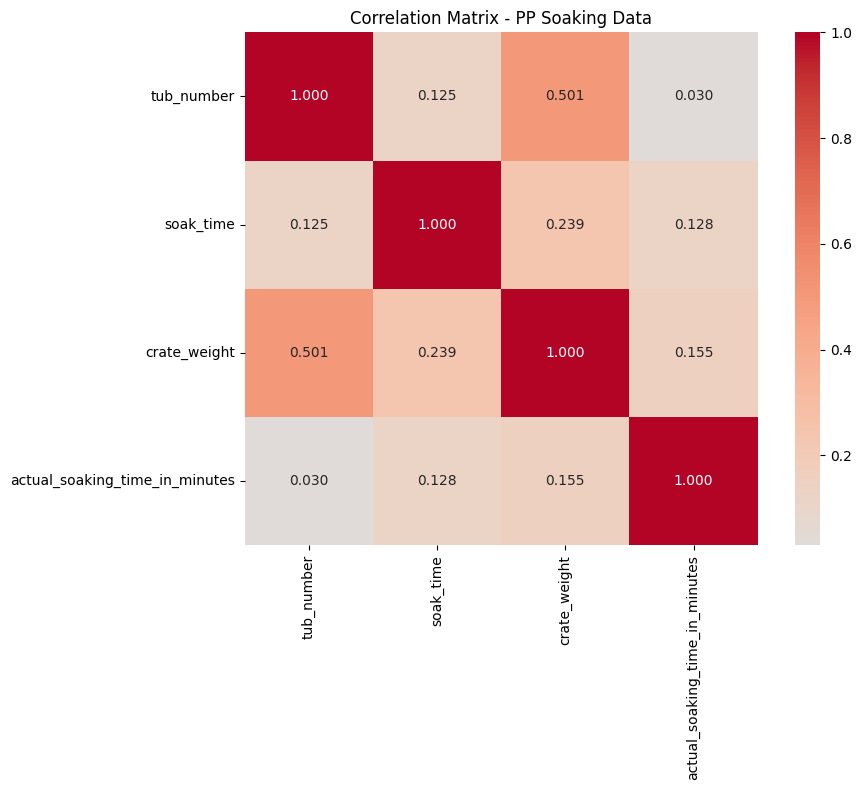

In [47]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_cols = [
    "tub_number",
    "soak_time",
    "crate_weight",
    "actual_soaking_time_in_minutes",
]
correlation_matrix = pp_soaking_df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".3f"
)
plt.title("Correlation Matrix - PP Soaking Data")
plt.tight_layout()
plt.show()

In [ ]:
pp_soaking_readings_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_soaking_readings", engine
)
pp_soaking_readings_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,35897.0,45654.327855,137.0,40180.0,49160.0,58134.0,67108.0,15905.86422
session_id,35897.0,65823.060228,74.0,61119.0,69878.0,79029.0,88173.0,17684.494921
weight,35897.0,149.421173,0.2,150.0,160.600006,161.619995,226.720001,26.398483
sequence_number,35897.0,1.019918,1.0,1.0,1.0,1.0,23.0,0.388532
epoch,35897.0,1736249267.857008,1712981200.0,1712981200.0,1744460582.0,1749863967.0,1755078256.0,16850080.75555
epoch_date,35897,2025-01-07 14:05:30.179764224,2024-04-13 04:06:40,2024-04-13 04:06:40,2025-04-12 12:23:02,2025-06-14 06:49:27,2025-08-13 15:14:16,NaN
created_at,35897,2025-04-05 13:56:53.294202880,2024-05-28 11:33:29,2025-02-12 01:03:06,2025-04-12 23:34:52,2025-06-14 06:54:58,2025-08-13 15:14:29,NaN
crates,35897.0,3.489122,0.0,0.0,5.0,5.0,8.0,2.258222
tub_number,35897.0,25.312979,0.0,0.0,15.0,42.0,145.0,28.732617


In [ ]:
pp_soaking_temperature_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_soaking_temperature", engine
)
pp_soaking_temperature_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,84906.0,88236.25242,3.0,67130.25,88356.5,109582.75,130809.0,24764.420875
session_id,84906.0,73418.665536,0.0,69302.0,75736.5,81835.0,88173.0,13382.38644
temperature,84906.0,4.346418,-96.263817,2.859247,4.022485,5.560419,59.574791,2.297267
temperature_fault,84906.0,0.989365,0.0,1.0,1.0,1.0,2.0,0.349538
tub_number,84906.0,36.7395,0.0,13.0,31.0,56.0,100.0,27.82326
epoch,84906.0,1746642444.932455,0.0,1744075121.75,1748479584.5,1751355369.0,1755078337.0,10054155.380623
epoch_date,84906,2025-05-08 03:55:15.398522880,2024-04-13 04:06:40,2025-04-08 01:18:41.750000128,2025-05-29 06:16:24.500000,2025-07-01 13:06:09,2025-08-13 15:15:37,NaN
created_at,84906,2025-05-08 07:24:04.255305728,2024-04-13 04:06:40,2025-04-08 12:31:04,2025-05-29 06:17:07.500000,2025-07-01 13:06:43.249999872,2025-08-13 15:15:52,NaN


In [ ]:
pp_cooking_df = pd.read_sql("SELECT * FROM erpx_dev_production.pp_cooking", engine)
pp_cooking_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,1870.0,4695.64385,2731.0,4264.25,4737.5,5204.75,5672.0,637.903887
started_at,1870,2025-04-26 10:35:05.404813056,2025-01-02 13:06:00,2025-02-09 13:16:30,2025-05-20 15:44:00,2025-06-22 14:15:34.500000,2025-08-12 22:44:07,NaN
closed_at,1869,2025-04-26 12:24:15.998394624,2025-01-02 13:06:00,2025-02-09 13:18:00,2025-05-20 16:25:05,2025-06-22 15:48:50,2025-08-13 00:43:48,NaN
created_at,1870,2025-04-26 10:35:05.404813056,2025-01-02 13:06:00,2025-02-09 13:16:30,2025-05-20 15:44:00,2025-06-22 14:15:34.500000,2025-08-12 22:44:07,NaN
updated_at,1869,2025-04-26 12:24:15.998394624,2025-01-02 13:06:00,2025-02-09 13:18:00,2025-05-20 16:25:05,2025-06-22 15:48:50,2025-08-13 00:43:48,NaN
cooking_temp,1870.0,49.24984,0.0,0.0,72.0,72.0,76.0,33.487613
chilling_temp,1870.0,6.158824,0.0,0.0,9.0,9.0,15.0,4.189967


In [ ]:
pp_cooking_lot_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_cooking_lot", engine
)
pp_cooking_lot_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,1875.0,4708.566933,2742.0,4276.5,4750.0,5218.5,5687.0,638.692314
session_id,1875.0,4696.064,2731.0,4265.5,4737.0,5206.5,5672.0,637.668999
count,1875.0,40.286933,8.0,23.0,30.0,44.0,132.0,25.556121
created_at,1875,2025-05-02 10:29:56.154666496,2025-01-23 05:53:31,2025-02-11 19:34:59,2025-05-20 15:14:04,2025-06-22 15:45:24.500000,2025-08-12 22:44:07,NaN


In [ ]:
pp_cooking_readings_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_cooking_readings", engine
)
pp_cooking_readings_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,138837.0,101387.303608,30278.0,66714.0,101591.0,136300.0,171009.0,40360.228435
session_id,138837.0,4803.726672,2731.0,4477.0,4752.0,5293.0,5672.0,596.590299
sequence_number,138837.0,3163.573637,1.0,237.0,1361.0,4078.0,41370.0,4892.59065
epoch,138837.0,1747125717.776904,1712981200.0,1743443311.0,1747901479.0,1751319276.0,1755080878.0,5395385.09673
epoch_date,138837,2025-05-13 12:08:47.271491072,2024-04-13 04:06:40,2025-03-31 17:48:31,2025-05-22 13:41:19,2025-07-01 03:04:36,2025-08-13 15:57:58,NaN
temperature,138837.0,14.061966,0.0,4.0,6.0,18.125,85.027611,17.418568
temperature_type,138837.0,2.95857,1.0,2.0,3.0,4.0,4.0,1.091237
temperature_fault,138837.0,0.584138,0.0,0.0,1.0,1.0,2.0,0.4989
periodic_check_fault,138837.0,0.031317,0.0,0.0,0.0,0.0,1.0,0.174174
created_at,87015,2025-06-21 01:15:10.652519680,2025-04-21 13:33:34,2025-05-27 16:09:20,2025-06-20 15:09:04,2025-07-17 17:52:03.500000,2025-08-13 15:58:18,NaN


In [ ]:
pp_packing_df = pd.read_sql("SELECT * FROM erpx_dev_production.pp_packing", engine)
pp_packing_df.describe().T

,count,mean,min,25%,50%,75%,max,std
session_id,1430.0,2430.127972,1368.0,2089.25,2446.5,2803.75,3161.0,445.183025
no_of_bags,1430.0,8291.324476,0.0,0.0,0.0,17500.0,63000.0,12985.205302
active_packing_inward_lot_id,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
net_weight,1430.0,425.317476,0.03,0.454,0.908,4.6275,454017.0,12019.878428
min_weight,1430.0,1.777768,0.0,0.46125,1.03,1.06,13.615,2.763724
max_weight,1430.0,1.795244,0.0,0.47875,1.045,1.08,13.625,2.768507
created_at,1430,2025-05-23 19:01:59.913986048,2025-01-02 13:00:00,2025-04-09 19:04:45.500000,2025-06-07 12:10:32.500000,2025-07-20 23:45:37.249999872,2025-08-13 12:23:42,NaN
updated_at,1430,2025-06-22 01:49:10.025174784,2025-01-02 13:00:00,2025-05-18 22:51:48.249999872,2025-08-05 15:27:08,2025-08-05 15:27:08,2025-08-13 13:26:21,NaN
closed_at,1412,2025-06-22 18:59:25.541784832,2025-01-02 13:00:00,2025-05-19 12:48:11.249999872,2025-08-05 15:27:08,2025-08-05 15:27:08,2025-08-13 13:26:21,NaN
no_of_pouches,1430.0,10.308392,0.0,5.0,10.0,16.0,60.0,7.639214


In [ ]:
# This table has around 3.2 million rows, so avoiding pandas.

# pp_packing_reading_df = pd.read_sql('SELECT * FROM erpx_dev_production.pp_packing_reading', engine)
# pp_packing_reading_df.describe().T

In [ ]:
pp_packing_master_readings_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_packing_master_readings", engine
)
pp_packing_master_readings_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,289630.0,144869.329051,45.0,72462.25,144869.5,217276.75,289684.0,83609.412323
session_id,289630.0,2439.327307,1399.0,2215.0,2410.0,2629.0,3161.0,289.758237
weight,289630.0,7.486531,-0.112,5.32,5.46,10.16,25.219999,3.861835
weight_limit,289630.0,7.482518,0.27,5.31704,5.45,10.2,93.984001,3.86601
sequence_number,289630.0,818.430518,1.0,186.0,586.0,1248.0,3987.0,777.215228
epoch,289630.0,1749458837.678873,1739152041.0,1747088357.5,1749623079.5,1752072391.0,1755068647.0,3340152.687806
epoch_date,289630,2025-06-09 13:51:47.097786624,2025-02-10 01:47:21,2025-05-13 03:49:17.500000,2025-06-11 11:54:39.500000,2025-07-09 20:16:31,2025-08-13 12:34:07,NaN
fault,289630.0,1.010531,0.0,1.0,1.0,1.0,2.0,0.257833
created_at,289630,2025-06-09 14:26:18.850216192,2025-02-10 07:17:22,2025-05-13 03:50:49.750000128,2025-06-11 11:54:53.500000,2025-07-09 20:17:19.249999872,2025-08-13 12:34:28,NaN


In [ ]:
pp_packing_glazing_reading_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_packing_glazing_reading", engine
)
pp_packing_glazing_reading_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,17118.0,9265.225202,615.0,4988.25,9267.5,13546.75,17826.0,4945.507667
session_id,17118.0,2318.594579,1365.0,2087.0,2297.0,2515.0,80844.0,913.155723
frozen_weight,17118.0,0.674243,0.0,0.388,0.538,1.056,7.179,0.489252
de_glazed_weight,17118.0,0.587965,0.0,0.333,0.466,0.92,6.735,0.427236
glaze_percentage,17117.0,10.374744,-165.142853,7.980293,12.658234,14.018694,88.531815,5.956035
fault,17118.0,0.642657,0.0,0.0,0.0,0.0,3.0,1.188864
duration,17118.0,79.098551,0.0,28.0,44.0,59.0,39041.0,737.900982
sequence_number,17118.0,9.230225,1.0,1.0,2.0,6.0,845.0,38.628781
epoch,17118.0,1747849433.49743,1737591736.0,1745155885.25,1748401025.5,1750929966.25,1755080115.0,4119324.638055
epoch_date,17118,2025-05-21 21:50:37.808680960,2025-01-23 00:22:16,2025-04-20 13:31:25.249999872,2025-05-28 08:27:05.500000,2025-06-26 14:56:06.249999872,2025-08-13 15:45:15,NaN


In [ ]:
pp_packing_metal_detector_df = pd.read_sql(
    "SELECT * FROM erpx_dev_production.pp_packing_metal_detector", engine
)
pp_packing_metal_detector_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,20415.0,12008.365956,1544.0,6951.5,12061.0,17164.5,22268.0,5969.33699
session_id,20415.0,2197.800392,1368.0,2005.5,2110.0,2464.0,3145.0,449.320085
sequence_number,20415.0,18.679304,0.0,2.0,5.0,17.0,434.0,40.891987
is_testing,20415.0,0.264266,0.0,0.0,0.0,1.0,1.0,0.440953
epoch,20415.0,1746241359.096645,1737592118.0,1742345206.0,1745430278.0,1750156491.0,1755076854.0,5074645.250134
epoch_date,20415,2025-05-03 05:49:09.779965696,2025-01-23 00:28:38,2025-03-19 00:46:46,2025-04-23 23:14:38,2025-06-17 16:04:51,2025-08-13 14:50:54,NaN
created_at,20415,2025-05-03 11:20:44.805535232,2025-01-23 05:58:38,2025-03-19 06:21:53,2025-04-23 23:24:43,2025-06-17 17:01:00,2025-08-13 14:50:55,NaN
